# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 04__

__Nombres de los estudiantes: Carlos Tardón Rubio y Carlos Morán Alfonso__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [1]:
RANDOM_STATE = 42
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
df = pd.read_csv('cleveland.csv') # Leemos el dataframe a partir del fichero cleveland.csv
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
# Indicamos las variables que son categóricas
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
# modificamos el target para que tenga las categorias normal y enfermo
df['target'] = df['target'].apply(lambda x: 'normal' if x == 0 else 'enfermo')
df['target'] = df['target'].astype('category') # Establecemos target como categórica

In [5]:
# eliminamos las filas con valores nulos
df = df.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [6]:
# Las clases están más o menos equilibradas, hay 160 personas sanas y 137 enfermas, tan 
# solo un (160-137)/137 = 16.8% de diferencia. De todas formas usaremos las métricas precision,recall y F1
df['target'].value_counts()

normal     160
enfermo    137
Name: target, dtype: int64

In [7]:
df.describe(include=['category'])

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297
unique,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,2
top,1.0,4.0,0.0,0.0,0.0,1.0,0.0,3.0,normal
freq,201.0,142.0,254.0,147.0,200.0,139.0,174.0,164.0,160


In [8]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


##### Análisis distribuciones y rangos variables numéricas
Los rangos (94-200 y 71-202) y medias ( 17.76 y 22.9) de trestbps y thalach son bastante similares, aunque según la descripción están en medidas distintas. La edad de los pacientes admitidos está en el rango 29-77, con una media de 54 años. La variable colesterol es la que toma variables mayores, entre 126 y 564, mientras que oldpeak tiene un rango muy pequeño (entre 0 y 6.2), lo que indica que tendríamos que reescalarla si usaramos un método de clasificación basado en distancias (como KNN)

In [9]:
df.groupby('thal').describe(include=['category']).transpose()

thal               3.0      6.0      7.0
sex     count      164       18      115
        unique       2        2        2
        top          1        1        1
        freq        84       17      100
cp      count      164       18      115
        unique       4        4        4
        top          3        4        4
        freq        59       12       77
fbs     count      164       18      115
        unique       2        2        2
        top          0        0        0
        freq       144       13       97
restecg count      164       18      115
        unique       3        3        3
        top          0        2        2
        freq        83       10       57
exang   count      164       18      115
        unique       2        2        2
        top          0        0        1
        freq       133       10       58
slope   count      164       18      115
        unique       3        3        3
        top          1        2        2
        freq       100       13       68
ca      count      164       18      115
        unique       4        4        4
        top          0        0        0
        freq       115        8       51
target  count      164       18      115
        unique       2        2        2
        top     normal  enfermo  enfermo
        freq       127       12       88

<AxesSubplot:ylabel='Density'>

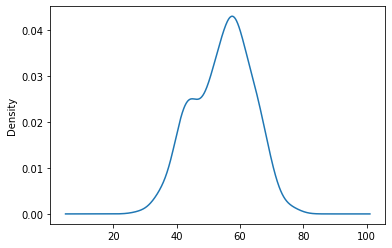

In [10]:
df['age'].plot.density() # Se asemeja a una normal, aunque tiene una pequeña asimetría

<AxesSubplot:ylabel='Density'>

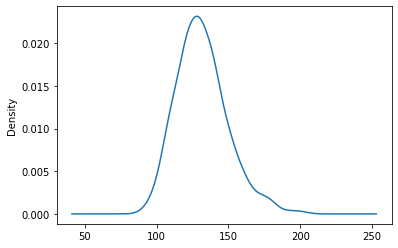

In [11]:
df['trestbps'].plot.density() # Se asemeja bastante a una normal

<AxesSubplot:ylabel='Density'>

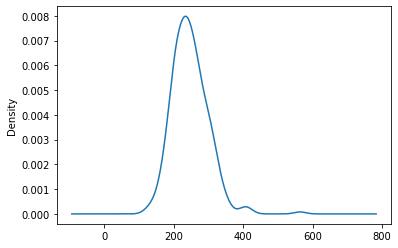

In [12]:
df['chol'].plot.density() # Se asemeja bastante a una normal

<AxesSubplot:ylabel='Density'>

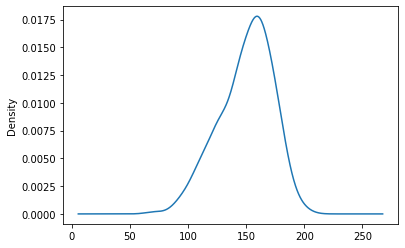

In [13]:
df['thalach'].plot.density() # Se asemeja a una normal, pero es un poco asimétrica

<AxesSubplot:ylabel='Density'>

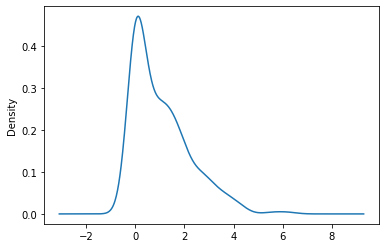

In [14]:
df['oldpeak'].plot.density() # No se asemeja a una normal, es asimétrica

In [15]:
num_variables = df.select_dtypes(exclude='category').columns.values

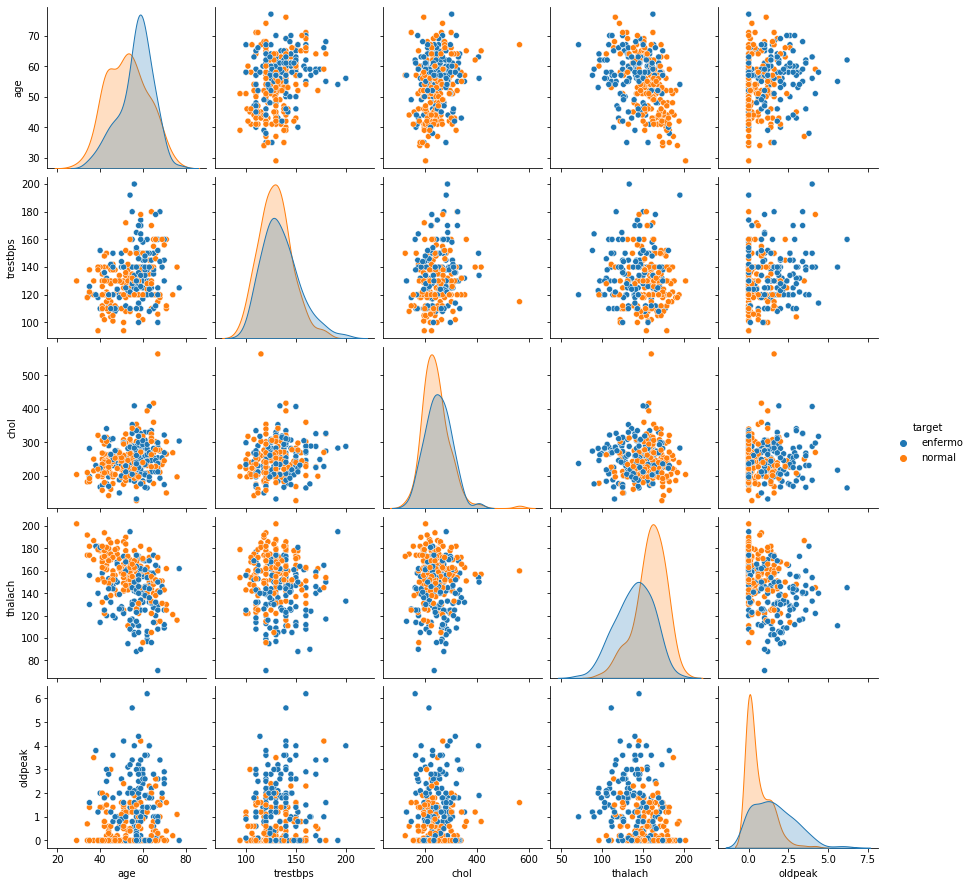

In [16]:
import seaborn as sns

sns.pairplot(df, diag_kind='kde', hue='target', vars=num_variables)

Lo primero que se observa del diagrama de dispersión es que no hay pares de variables que separen perfectamente las clases, pues en todos ellos hay bastantes puntos que están en la misma región del espacio. Sin embargo, algunos pares separan mejor que otros, como es el caso de oldpeak/age, en el que al parecer, si dos pacientes tienen la misma edad, el que tenga mayor oldpeak tiene más probabilidad de estar enfermo. Lo mismo sucede con los pares oldpeak/trestbps, y thalach/oldpeak.
    En cuanto a las variables individuales, fijandonos en las funciones de densidad, se observa que la densidad de enfermos tiene una media de edad más elevada que la densidad de personas normales (lo que nos podría indicar que el árbol de decisión elegiría esta variable para separar). En cuanto a las variables chol y trestbps, las funciones de densidad para enfermos y sanos parecen ser muy similares. La media de thalach de la distribución de normales parece ser superior a la de enfermos. Por último, las distribuciones de oldpeak de enfermos y normales parecen ser totalmente distintas, pues los normales tienen un oldpeak medio menor que los enfermos, y la distribución de normales tiene una menor varianza que la de enfermos(si los separamos por oldpeak). Por tanto, esta última variable también puede ser candidato para que la elija el árbol de decisión. 

In [17]:
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.290476,0.202644,-0.394563,0.197123
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243
chol,0.202644,0.131536,1.000000,-0.000075,0.038596
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000


En cuanto a la correlación entre variables, se observa que ningún par de ellas está muy positivamente correlacionada, destacando unicamente trestbps/age, con 0.29 de correlación. Como pares negativamente correlacionados destacan thalach/age (-0.39) y oldpeak/thalach (-0.3476)

A priori no parece un problema demasiado sencillo de resolver, pues los pares de variables no separan totalmente las dos categorías. Sin embargo, tampoco parece muy complicado, pues, como hemos observado, inicialmente ya hay variables que separan las distribuciones de enfermos y sanos, lo cual es una información relevante cuando construyamos el árbol de decisión.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

 Como estamos usando árboles de decisión, no es necesario reescalar los datos ni estandarizarlos, pues la decisión tomada en cada nodo solo afectan a una de las variables

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [18]:
# df.columns.difference proporciona los nombres de las columnas que no  pertenecen al conjunto pasado
# como parámetro, en este caso target
data_cols = df.columns.difference(['target'])
train_data = df[data_cols].values  # Obtenemos las variables de entrenamiento, que son 
                                                    # todas menos la variable target.
train_data

array([[ 63.,   0., 233., ...,   6., 150., 145.],
       [ 67.,   3., 286., ...,   3., 108., 160.],
       [ 67.,   2., 229., ...,   7., 129., 120.],
       ...,
       [ 68.,   2., 193., ...,   7., 141., 144.],
       [ 57.,   1., 131., ...,   7., 115., 130.],
       [ 57.,   1., 236., ...,   3., 174., 130.]])

In [19]:
train_labels = df[['target']].values # Obtenemos el array de las clases
train_labels

array([['normal'],
       ['enfermo'],
       ['enfermo'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['enfermo'],
       ['normal'],
       ['enfermo'],
       ['enfermo'],
       ['normal'],
       ['normal'],
       ['enfermo'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['enfermo'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['enfermo'],
       ['enfermo'],
       ['enfermo'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['enfermo'],
       ['normal'],
       ['enfermo'],
       ['enfermo'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['enfermo'],
       ['enfermo'],
       ['enfermo'],
       ['normal'],
       ['enfermo'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['enfermo'],
       ['enfermo'],
       ['normal'],
       ['enfermo'],
       ['normal'],
       ['normal'],
       ['normal'],
       ['no

In [20]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 10) # Estudiaremos los arboles con profundidad maxima entre 1 y 9
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", # Usamos entropía como método de selección
                                 max_depth=md, 
                                 min_samples_split=3, random_state=RANDOM_STATE) # establecer el parámetro `random_state`
    scores = cross_validate(clf, train_data, train_labels, 
                            scoring='accuracy', cv=10, # Validación cruzada en 10 partes
                            return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9143314327240205,
  0.9487618089328638,
  0.9670984962826317,
  0.9816842752529487,
  0.9906534742020237],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7641379310344828,
  0.763793103448276,
  0.7539080459770116,
  0.7573563218390804,
  0.7605747126436782,
  0.7708045977011495])

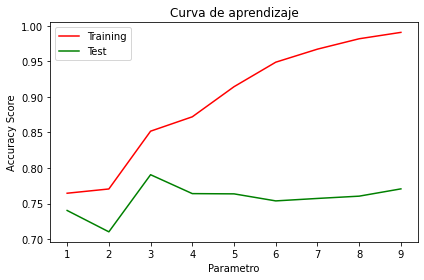

In [21]:
# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

##### Como vemos, la accuracy sobre test empieza a descender en max_depth=3, así que elegimos este valor como profundidad óptima. Con esta profundidad, se ha alcanzado una precisión de 0.85185 para el conjunto de entrenamiento, y de 0.7907 para testing

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:

In [22]:
MAX_DEPTH = 3 # La profundidad óptima
clf = DecisionTreeClassifier(criterion="entropy", # Usamos entropía como método de selección
                                 max_depth=MAX_DEPTH, 
                                 min_samples_split=3, random_state=RANDOM_STATE) # establecer el parámetro `random_state`
clf.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       random_state=42)

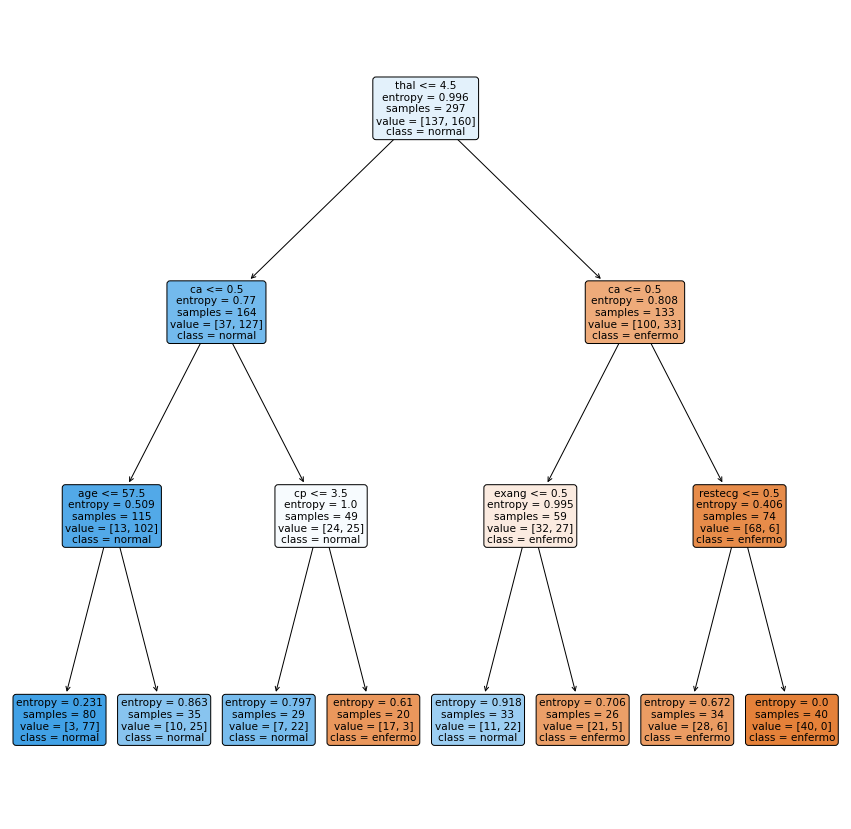

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True,feature_names=data_cols, class_names=['enfermo','normal'], rounded=True)
plt.show()

- ¿Cuáles son las variables más importantes y en qué orden? 
Las variables más importantes son las más cercanas a la raíz, y a igualdad de altura, la que menor entropía tenga. La más importante es thal(la raíz), después ca (los hijos de la raíz), después restecg, age, exang y cp.

- ¿Hay variables del conjunto de datos que no se han usado? 
Si, pues solo se han usado thal,ca,restecg,age,exang y cp. Es decir, no se han usado sex, trestbps, chol, fbs, thalach,oldpeak ni slope. Al parecer, todas las variables elegidas excepto age son categóricas.

- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
La primera pregunta que se hace es thal <= 4.5 . Si thal <=4.5 se clasifica como normal. Si no, se clasifica como enfermo. Por tanto, vamos a calcular la accuracy basandonos en esta predicción:


In [24]:
# Thal es categórica, luego thal <= 4.5 <=> thal = 3
predict = df['thal'].apply(lambda x: 'normal' if x == 3 else 'enfermo')
predict

0      enfermo
1       normal
2      enfermo
3       normal
4       normal
        ...   
297    enfermo
298    enfermo
299    enfermo
300    enfermo
301     normal
Name: thal, Length: 297, dtype: object

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(df['target'],predict) # Calculamos la accuracy, tomando y_true=df['target'], y_pred=predict

0.7643097643097643

Por tanto, la accuracy si solo hacemos una pregunta es de 0.7643, un 76.43% de aciertos (una cifra muy similar al valor que obtuvimos en el array de train_accuracy cuando hicimos cross_validation)

- ¿El árbol que hemos construido es capaz de separar las clases?   
No separa las clases totalmente, pues hay nodos hoja con entropía no nula, luego en estos nodos hay individuos que pertenecen a las dos clases. Por ejemplo, la hoja de la izquierda está clasificada como normal, pero la entropía es 0.231, luego hay ejemplos con target= enfermo pero que tienen thal<=4.5, ca<=0.5, y age<=57.5.

- ¿En cuál de los nodos hoja existe mayor confusión?  
En el nodo hoja que existe mayor confusión es el de entropía máxima = 0.918, que está clasificado como normal.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [26]:
# Calculamos precision, recall y f1 agregados usando el árbol del apartado anterior
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

clf2 = DecisionTreeClassifier(criterion="entropy", # Usamos entropía como método de selección
                                 max_depth=MAX_DEPTH, 
                                 min_samples_split=3, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf2, train_data, train_labels, scoring=scoring_metrics, 
                        cv=10, # Validacion cruzada de 10 partes
                        return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


###### El arbol tiene una precisión media del 81.05%, un recall medio del 79.07% y un F1_score medio del 78.03%.  Es decir, en general, el árbol funciona bien, pues ambas métricas están por encima del 79%. Aunque no debemos olvidar que intentamos resolver un problema de la vida real, donde es preferible una mayor tasa de precisión y recall, por lo que, en un principio, descartaríamos este modelo como única forma de predicción de enfermedades cardiovasculares, aunque detallaremos esto en las métricas por clases

In [27]:
# Calculamos las metricas por clases
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", # Usamos entropía como método de selección
                                 max_depth=MAX_DEPTH, 
                                 min_samples_split=3, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, train_data, train_labels, cv=10)

# Informe por clases
cr = classification_report(train_labels,predictions, target_names=['enfermo','normal'])
print(cr)

              precision    recall  f1-score   support

     enfermo       0.82      0.71      0.76       137
      normal       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



##### Lo primero que se observa, y dado que esta aplicación se usará para detectar enfermedades en pacientes reales, es que el recall de la clase 'enfermo' es tan solo del 71%, es decir, solo nos dice que están enfermas un 71% de las personas que realmente lo están, una cifra muy inferior a lo esperable para una aplicación real. 

##### Además, la precisión de la clase 'normal' es del 78%, por lo que si te dice que estás sano, hay un 22% de posibilidades de que no lo estés. Es un error bastante grande, no se podría descartar un ingreso en el hospital aunque el modelo dijera que el paciente está sano.

##### Por contra, la clase enfermo tiene una precisión del 82%(una cifra mayor a las anteriores), es decir, si te dice que estás enfermo, lo estás con un 82% de posibilidades. Esto puede servirnos para el servicio de Urgencias: si dice que estás enfermo, lo más probable es que lo estés, así que mejor ingresarte cuanto antes.

##### Como dato positivo tenemos el recall de la clase 'normal', que es del 86%. Esto nos dice que detectamos al 86% de las personas que están sanas. Es decir, el modelo podría no servirnos para un hospital, pero nos revela a casi toda la población sana, por lo que podríamos usarlo para crear una base de datos de posibles actores de un anuncio de fitness (aunque claro, no sabemos si todos los que el modelo ha dicho que son sanos lo son realmente)

In [28]:
# La matriz de confusión
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

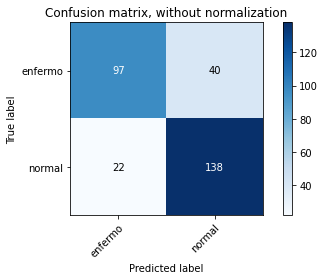

In [29]:
plot_confusion_matrix(train_labels, predictions, ['enfermo','normal'], normalize=False)

Como hemos visto en las métricas detalladas por clases, un gran número de personas enfermas(40 de entre 137 enfermos totales) son clasificadas como personas sanas. Tan solo 22 personas sanas son clasificadas como enfermas. Lo ideal en una matriz de confusión es que los valores de la diagonal sean lo mayores posibles.

Como conclusiones finales, destacamos lo anteriormente dicho: la fiabilidad de este modelo (principalmente vista por el recall de la clase enfermo) nos impide utilizarlo como unica forma de predicción de enfermedades cardiovasculares. Sin embargo, sí sería positivo usarlo con otras formas de predicción, como por ejemplo usar un experto en el dominio. Este experto del dominio podría consultar el modelo como otra fuente de datos más, e incorporar el conocimiento que este modelo le ofrece. Además, los modelos de árboles de decisión tienen la ventaja de que son fácilmente interpretables, así que el experto del dominio puede seguir el razonamiento del árbol, y detectar si existe alguna irregularidad en el proceso decisivo(para así poder aumentar el número de personas enfermas detectadas)